## Import Statements

In [1]:
import pandas as pd

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [13]:
languages = pd.read_csv('QueryResults.csv', header=0, names=['Date', 'TagName', 'PostCount'])

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [15]:
languages.head()

,Date,TagName,PostCount
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [16]:
languages.tail()

,Date,TagName,PostCount
2700,2024-10-01 00:00:00,php,677
2701,2024-10-01 00:00:00,python,3596
2702,2024-10-01 00:00:00,r,803
2703,2024-10-01 00:00:00,ruby,63
2704,2024-10-01 00:00:00,swift,478


Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [17]:
languages.shape

(2705, 3)

Count the number of entries in each column of the dataframe

In [18]:
languages.count()

Date         2705
TagName      2705
PostCount    2705
dtype: int64

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [21]:
languages.groupby('TagName').sum().sort_values(by='PostCount', ascending=False)

,Date,PostCount
TagName,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2531489
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2206956
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1918162
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1621997
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1467223
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,811429
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,509236
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,406464
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,335378


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry? 


In [23]:
languages.groupby('TagName').count().sort_values(by='PostCount', ascending=False)

,Date,PostCount
TagName,,
c#,196,196
assembly,195,195
c,195,195
c++,195,195
delphi,195,195
java,195,195
python,195,195
javascript,195,195
perl,195,195


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [24]:
languages['Date'][1]

'2008-08-01 00:00:00'

In [25]:
type(languages['Date'][1])

str

In [28]:
languages['Date'] = pd.to_datetime(languages['Date'])
languages.head()

,Date,TagName,PostCount
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [35]:
reshaped_languages = languages.pivot(index='Date', columns='TagName', values='PostCount')
reshaped_languages.tail()



TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2024-06-01,85.0,532.0,1926.0,1058.0,67.0,223.0,1667.0,2927.0,29.0,946.0,5024.0,1086.0,108.0,575.0
2024-07-01,91.0,557.0,2090.0,1128.0,54.0,250.0,1528.0,2890.0,34.0,865.0,5225.0,1055.0,93.0,576.0
2024-08-01,113.0,483.0,1843.0,1026.0,83.0,208.0,1205.0,2498.0,42.0,799.0,4508.0,879.0,106.0,546.0
2024-09-01,86.0,448.0,1567.0,987.0,67.0,154.0,1275.0,2169.0,26.0,605.0,3711.0,750.0,83.0,514.0
2024-10-01,92.0,470.0,1631.0,953.0,87.0,187.0,1555.0,1949.0,21.0,677.0,3596.0,803.0,63.0,478.0


What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [40]:
reshaped_languages.shape

(196, 14)

In [39]:
reshaped_languages.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [38]:
reshaped_languages.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,221.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1123.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


Count the number of entries per programming language. Why might the number of entries be different? 

In [41]:
reshaped_languages.count()  # some languages have missing values nan

TagName
assembly      195
c             195
c#            196
c++           195
delphi        195
go            180
java          195
javascript    195
perl          195
php           195
python        195
r             193
ruby          195
swift         186
dtype: int64

In [42]:
reshaped_languages.isnull().sum()

TagName
assembly       1
c              1
c#             0
c++            1
delphi         1
go            16
java           1
javascript     1
perl           1
php            1
python         1
r              3
ruby           1
swift         10
dtype: int64

In [45]:
reshaped_languages.fillna(0, inplace=True)
reshaped_languages.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,221.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1123.0,633.0,130.0,474.0,535.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1146.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


## Data Visualisaton with with Matplotlib


 Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [56]:
import matplotlib.pyplot as plt

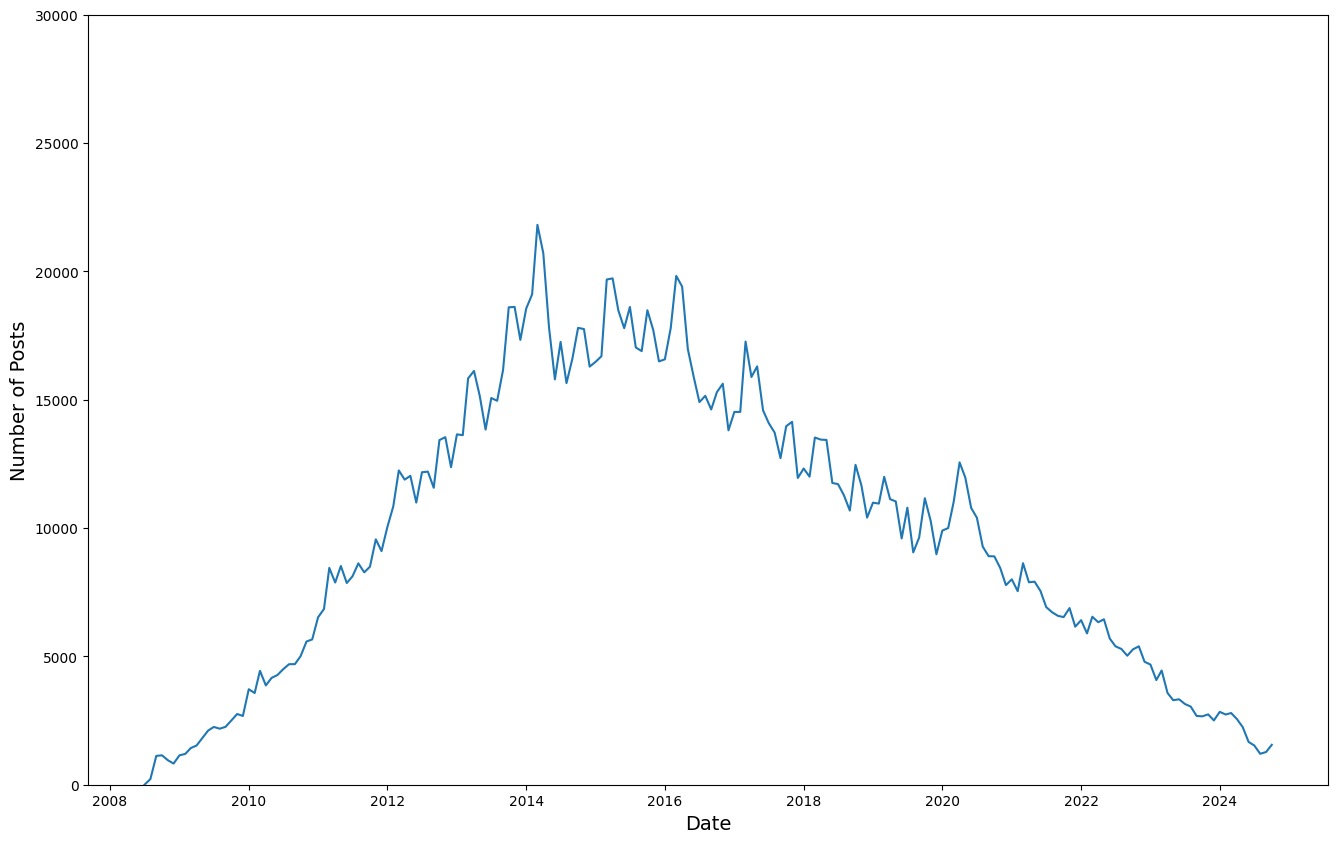

In [72]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)
plt.plot(reshaped_languages['java'])


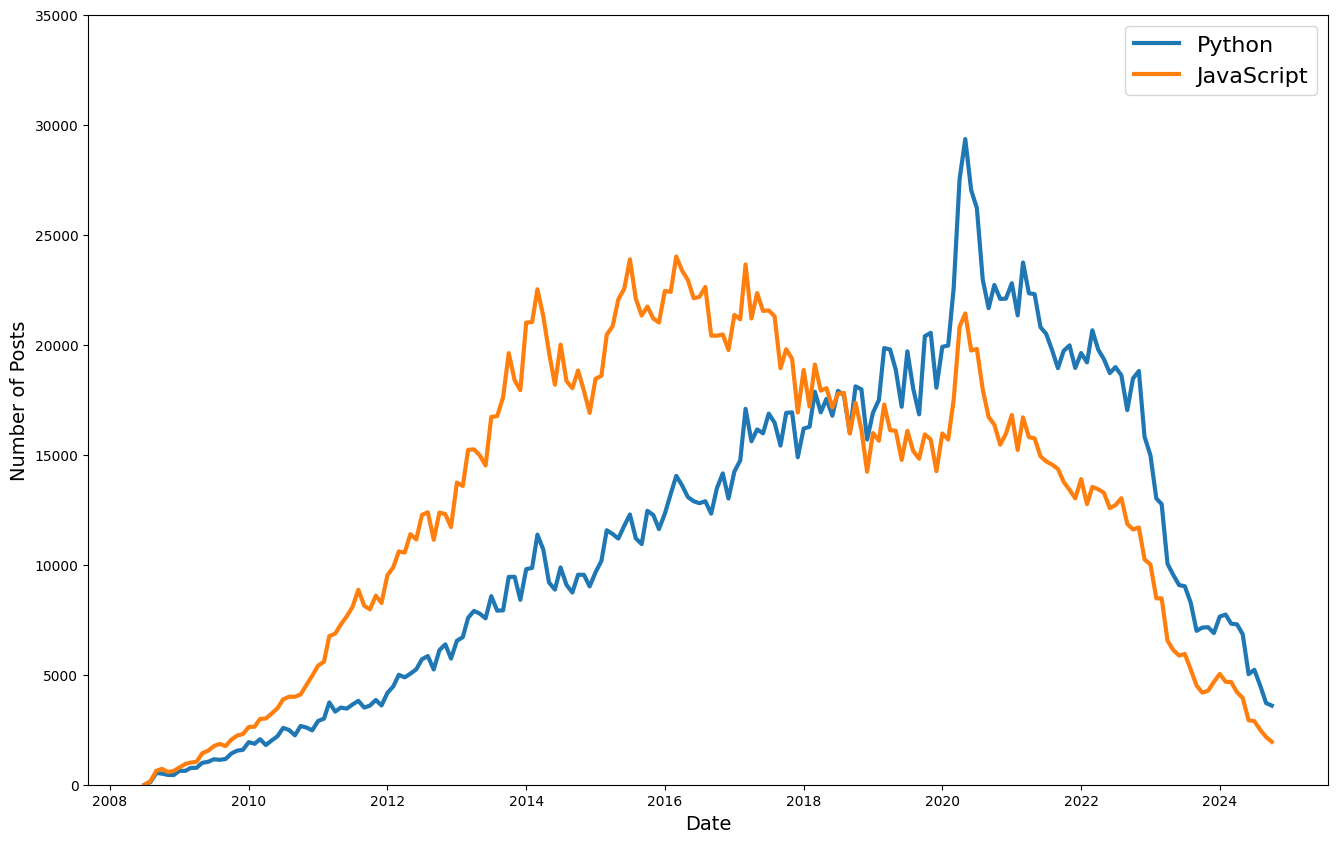

In [70]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_languages.index, reshaped_languages['python'], label='Python', linewidth=3)
plt.plot(reshaped_languages.index, reshaped_languages['javascript'], label='JavaScript', linewidth=3)
plt.legend(fontsize=16)


 Show two line (e.g. for Java and Python) on the same chart.

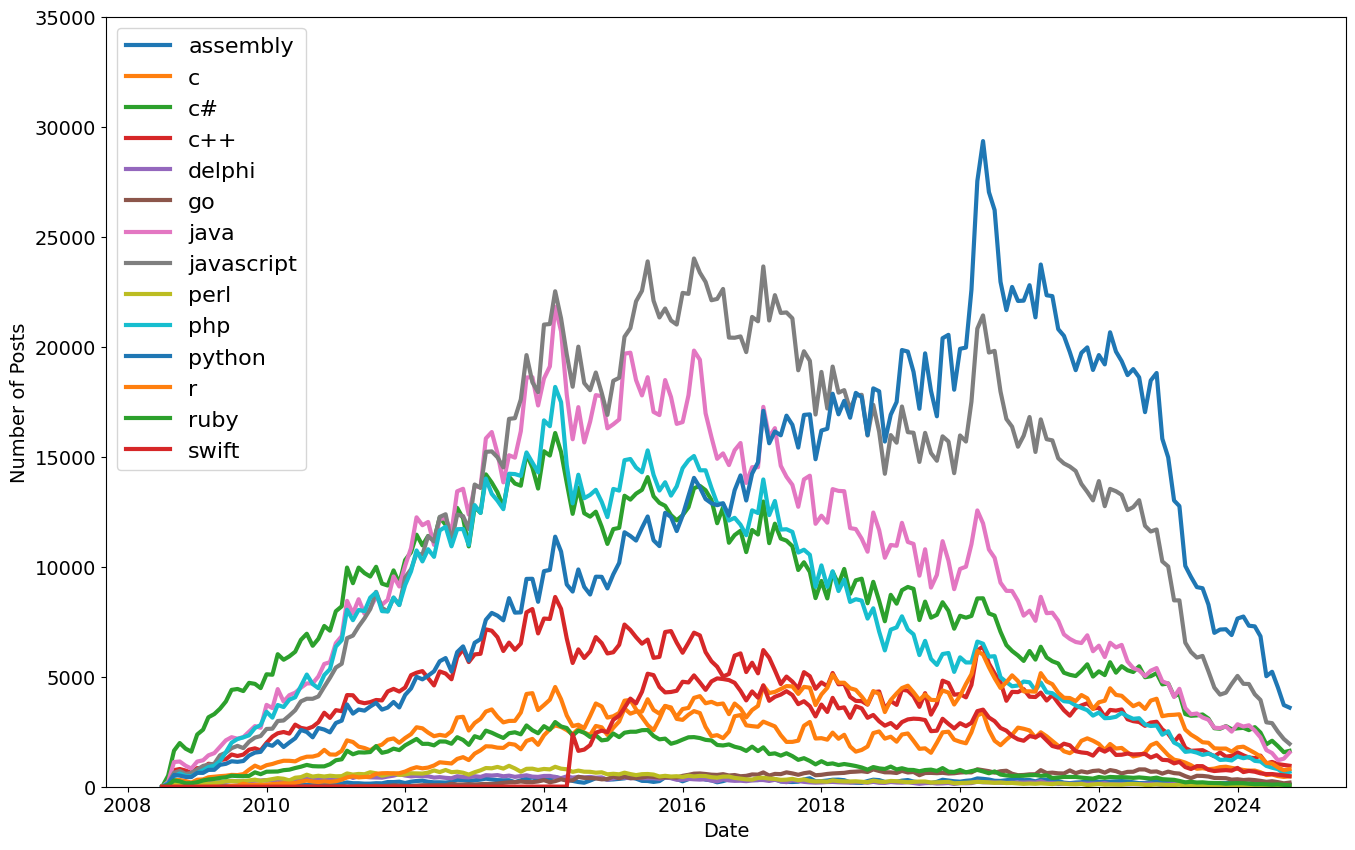

In [75]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_languages.columns:
    plt.plot(reshaped_languages.index, reshaped_languages[column], label=reshaped_languages[column].name, linewidth=3)
plt.legend(fontsize=16)


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

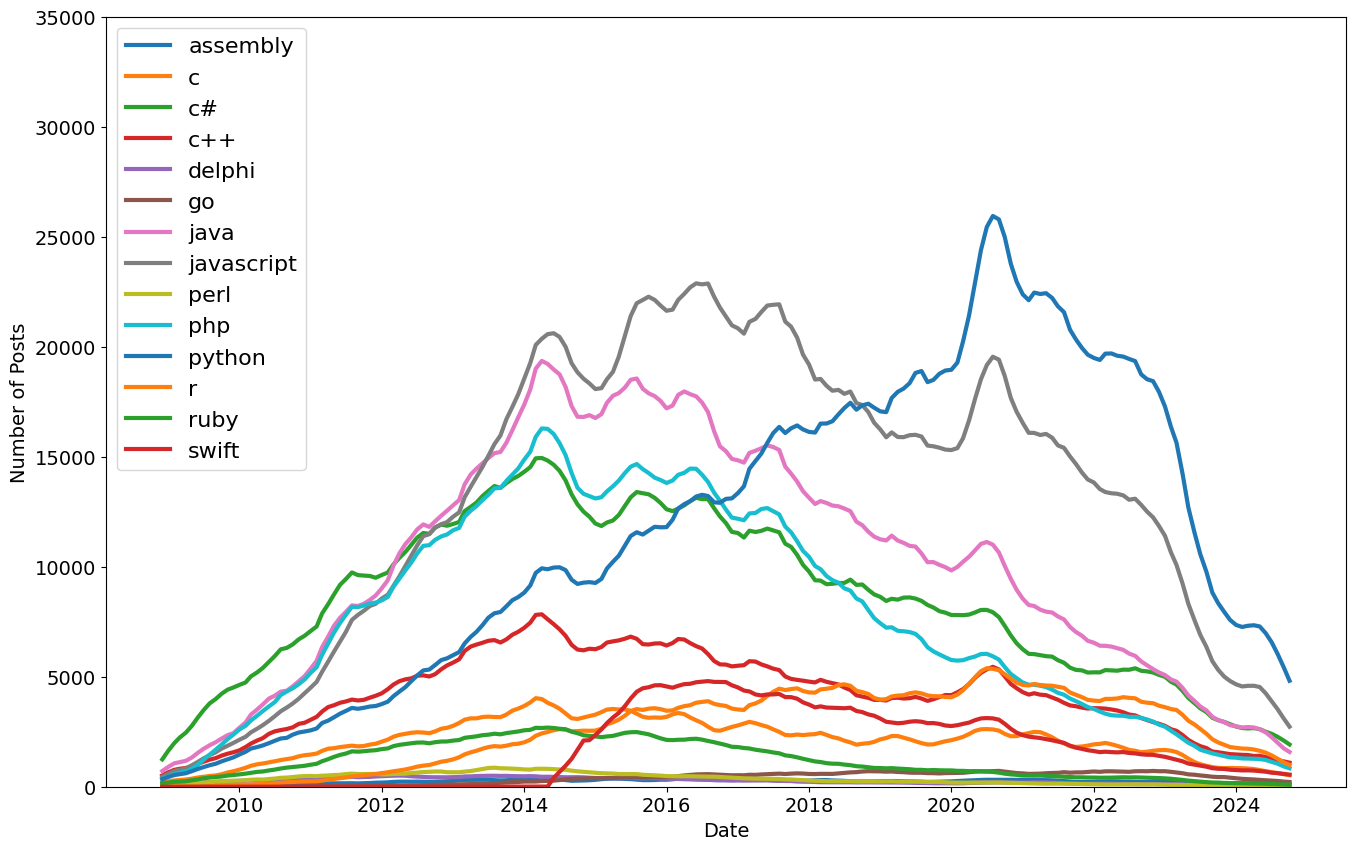

In [76]:
rolling_languages  = reshaped_languages.rolling(window=6).mean()

plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_languages.columns:
    plt.plot(reshaped_languages.index, rolling_languages[column], label=reshaped_languages[column].name, linewidth=3)
plt.legend(fontsize=16)

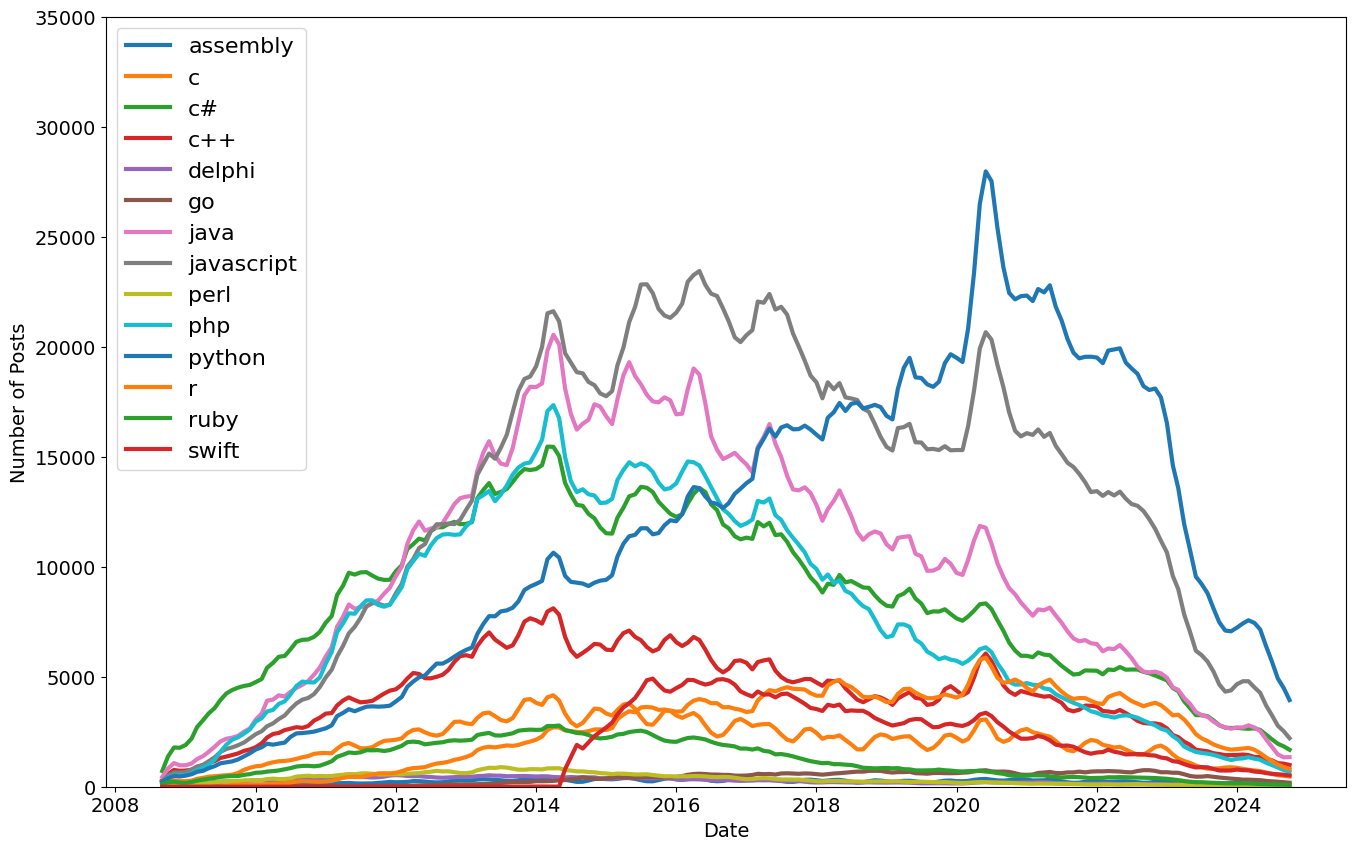

In [82]:
rolling_languages  = reshaped_languages.rolling(window=3).mean()

plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_languages.columns:
    plt.plot(reshaped_languages.index, rolling_languages[column], label=reshaped_languages[column].name, linewidth=3)
plt.legend(fontsize=16)

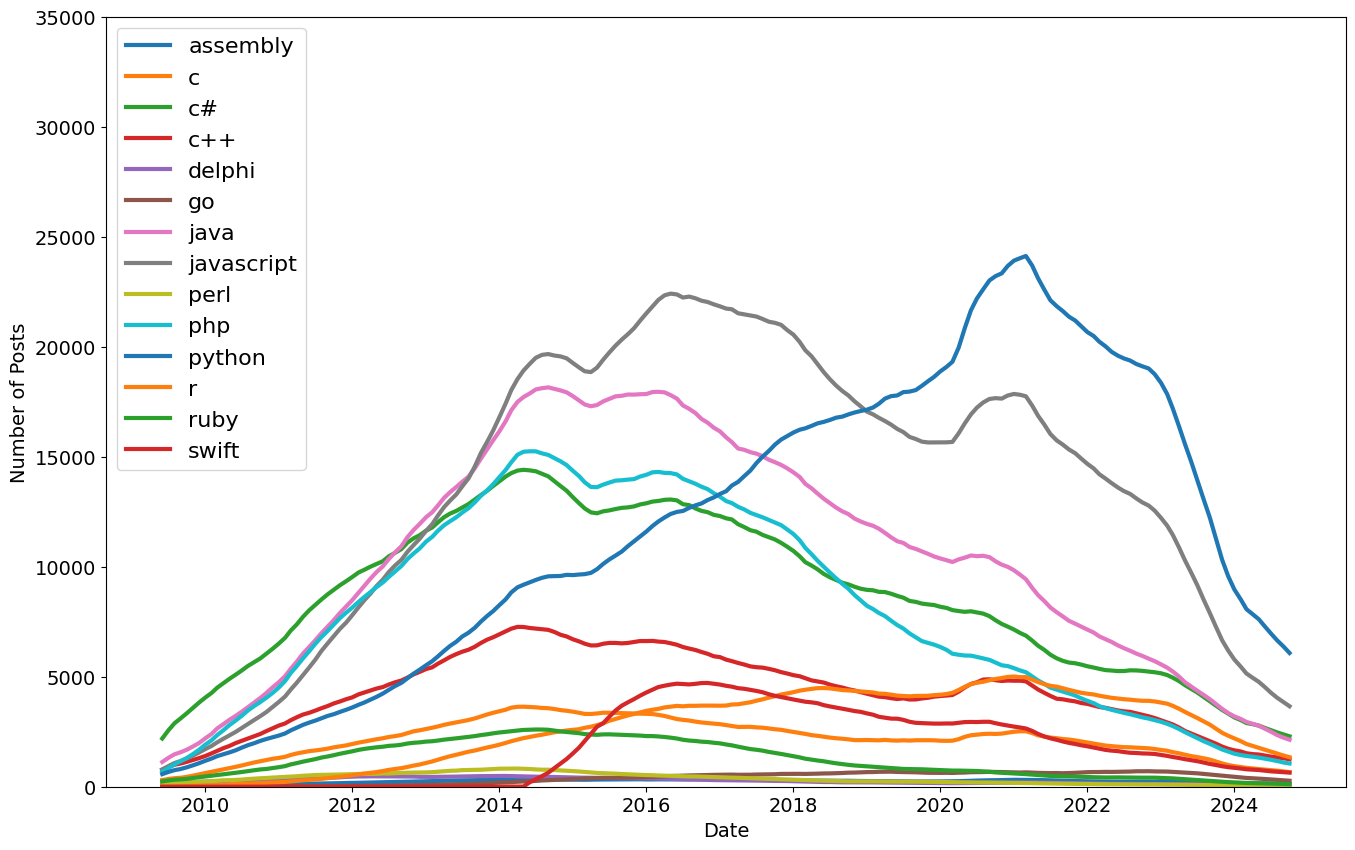

In [81]:
rolling_languages  = reshaped_languages.rolling(window=12).mean()

plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_languages.columns:
    plt.plot(reshaped_languages.index, rolling_languages[column], label=reshaped_languages[column].name, linewidth=3)
plt.legend(fontsize=16)